In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [195]:
df1 = pd.read_csv('uber_carpoolservice.csv')
df2 = pd.read_csv('lyft_carpoolservice.csv')

In [196]:
df1.head()

,Unnamed: 0,date_time,date,day,uber_display_name,uber_distance,uber_duration,end_latitude,end_location,end_longitude,...,main_temp,main_temp_max,main_temp_min,uber_product_id,start_latitude,start_location,start_longitude,time,weather,uber_category
0,0,2/25/2018 0:00,25-Feb-18,Sunday,POOL,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,...,39.52,44.6,33.8,997acbb5-e102-41e1-b155-9df7de0a73f2,42.361652,Urban AdvenTours,-71.052037,0:00:04,Clear,Carpool Service
1,6,2/25/2018 0:01,25-Feb-18,Sunday,POOL,1.50,420,42.355373,Boston Common,-71.065750,...,39.52,44.6,33.8,997acbb5-e102-41e1-b155-9df7de0a73f2,42.347060,Kings Dining & Entertainment - Boston Back Bay,-71.085650,0:01:03,Clear,Carpool Service
2,12,2/25/2018 0:02,25-Feb-18,Sunday,POOL,1.45,360,42.363520,Innercity Weightlifting,-71.082860,...,39.47,44.6,33.8,997acbb5-e102-41e1-b155-9df7de0a73f2,42.377843,Achieve Fitness,-71.091881,0:02:03,Clear,Carpool Service
3,18,2/25/2018 0:03,25-Feb-18,Sunday,POOL,2.26,540,42.370460,Broadway Bicycle School,-71.103520,...,39.79,44.6,33.8,997acbb5-e102-41e1-b155-9df7de0a73f2,42.348503,Commonwealth Avenue Mall,-71.094223,0:03:04,Clear,Carpool Service
4,24,2/25/2018 0:04,25-Feb-18,Sunday,POOL,2.47,540,42.352040,Btone Fitness - Back Bay,-71.072590,...,38.95,44.6,33.8,997acbb5-e102-41e1-b155-9df7de0a73f2,42.365095,Prana Power Yoga,-71.102730,0:04:03,Clear,Carpool Service


In [197]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [198]:
df1.columns

Index(['date_time', 'date', 'day', 'uber_display_name', 'uber_distance',
       'uber_duration', 'end_latitude', 'end_location', 'end_longitude',
       'uber_max_estimate', 'uber_min_estimate', 'main_temp', 'main_temp_max',
       'main_temp_min', 'uber_product_id', 'start_latitude', 'start_location',
       'start_longitude', 'time', 'weather', 'uber_category'],
      dtype='object')

In [199]:
df2.head()

,date_time,lyft_display_name,lyft_max_estimate,lyft_min_estimate,lyft_distance,lyft_duration,lyft_category
0,2/25/2018 0:00,Lyft Line,352,352,3.10,745,Carpool Service
1,2/25/2018 0:01,Lyft Line,308,308,1.82,589,Carpool Service
2,2/25/2018 0:02,Lyft Line,428,428,1.61,422,Carpool Service
3,2/25/2018 0:03,Lyft Line,335,335,2.65,690,Carpool Service
4,2/25/2018 0:04,Lyft Line,589,589,2.66,767,Carpool Service


In [200]:
df1 = df1.set_index(pd.DatetimeIndex(df1['date_time']))
df2 = df2.set_index(pd.DatetimeIndex(df1['date_time']))

In [201]:
df2.lyft_max_estimate = (df2.lyft_max_estimate).divide(100)
df2.lyft_min_estimate = (df2.lyft_min_estimate).divide(100)

In [202]:
df1['uber_max_estimate']
df1['uber_min_estimate']

date_time
2018-02-25 00:00:00     9
2018-02-25 00:01:00     6
2018-02-25 00:02:00     6
2018-02-25 00:03:00     8
2018-02-25 00:04:00     8
2018-02-25 00:05:00     8
2018-02-25 00:06:00    10
2018-02-25 00:07:00     4
2018-02-25 00:08:00     7
2018-02-25 00:09:00     8
2018-02-25 00:10:00     8
2018-02-25 00:11:00     6
2018-02-25 00:12:00     8
2018-02-25 00:13:00     8
2018-02-25 00:14:00     8
2018-02-25 00:15:00     8
2018-02-25 00:16:00     7
2018-02-25 00:17:00    10
2018-02-25 00:18:00     7
2018-02-25 00:19:00     9
2018-02-25 00:20:00     9
2018-02-25 00:21:00     5
2018-02-25 00:22:00    10
2018-02-25 00:23:00     7
2018-02-25 00:24:00     7
2018-02-25 00:25:00     5
2018-02-25 00:26:00     5
2018-02-25 00:27:00    10
2018-02-25 00:28:00     7
2018-02-25 00:29:00    11
                       ..
2018-03-03 23:29:00     8
2018-03-03 23:30:00     9
2018-03-03 23:31:00     8
2018-03-03 23:32:00     8
2018-03-03 23:33:00     6
2018-03-03 23:34:00     7
2018-03-03 23:35:00     7
20

In [203]:
df1['y'] = (df1['uber_max_estimate'] + df1['uber_min_estimate'])/2
df2['y'] = (df2['lyft_max_estimate'] + df2['lyft_min_estimate'])/2

In [204]:
df1.rename(columns={"uber_price_estimate": "y"},inplace=True)
df1.rename(columns={"date_time": "ds"},inplace=True)

In [205]:
df2.rename(columns={"lyft_price_estimate": "y"},inplace=True)
df2.rename(columns={"date_time": "ds"},inplace=True)

In [206]:
df1['uber_price_per_second'] = df1.y/df1.uber_duration
df1['uber_price_per_second']

date_time
2018-02-25 00:00:00    0.020370
2018-02-25 00:01:00    0.019048
2018-02-25 00:02:00    0.020833
2018-02-25 00:03:00    0.018519
2018-02-25 00:04:00    0.018519
2018-02-25 00:05:00    0.020833
2018-02-25 00:06:00    0.018182
2018-02-25 00:07:00    0.018333
2018-02-25 00:08:00    0.021429
2018-02-25 00:09:00    0.018519
2018-02-25 00:10:00    0.018519
2018-02-25 00:11:00    0.019048
2018-02-25 00:12:00    0.013889
2018-02-25 00:13:00    0.020833
2018-02-25 00:14:00    0.018519
2018-02-25 00:15:00    0.017593
2018-02-25 00:16:00    0.021429
2018-02-25 00:17:00    0.018182
2018-02-25 00:18:00    0.021429
2018-02-25 00:19:00    0.015278
2018-02-25 00:20:00    0.018333
2018-02-25 00:21:00    0.014583
2018-02-25 00:22:00    0.016667
2018-02-25 00:23:00    0.017708
2018-02-25 00:24:00    0.016667
2018-02-25 00:25:00    0.013542
2018-02-25 00:26:00    0.016667
2018-02-25 00:27:00    0.025000
2018-02-25 00:28:00    0.025000
2018-02-25 00:29:00    0.028125
                         ...  

In [207]:
df2['lyft_price_per_second'] = df2.y/df2.lyft_duration
df2['lyft_price_per_second']

date_time
2018-02-25 00:00:00    0.004725
2018-02-25 00:01:00    0.005229
2018-02-25 00:02:00    0.010142
2018-02-25 00:03:00    0.004855
2018-02-25 00:04:00    0.007679
2018-02-25 00:05:00    0.004937
2018-02-25 00:06:00    0.008138
2018-02-25 00:07:00    0.009482
2018-02-25 00:08:00    0.005970
2018-02-25 00:09:00    0.005113
2018-02-25 00:10:00    0.004992
2018-02-25 00:11:00    0.005283
2018-02-25 00:12:00    0.004000
2018-02-25 00:13:00    0.004710
2018-02-25 00:14:00    0.004336
2018-02-25 00:15:00    0.005049
2018-02-25 00:16:00    0.005430
2018-02-25 00:17:00    0.006610
2018-02-25 00:18:00    0.005143
2018-02-25 00:19:00    0.006592
2018-02-25 00:20:00    0.004227
2018-02-25 00:21:00    0.004640
2018-02-25 00:22:00    0.006972
2018-02-25 00:23:00    0.010234
2018-02-25 00:24:00    0.005346
2018-02-25 00:25:00    0.005100
2018-02-25 00:26:00    0.007564
2018-02-25 00:27:00    0.004838
2018-02-25 00:28:00    0.006623
2018-02-25 00:29:00    0.011605
                         ...  

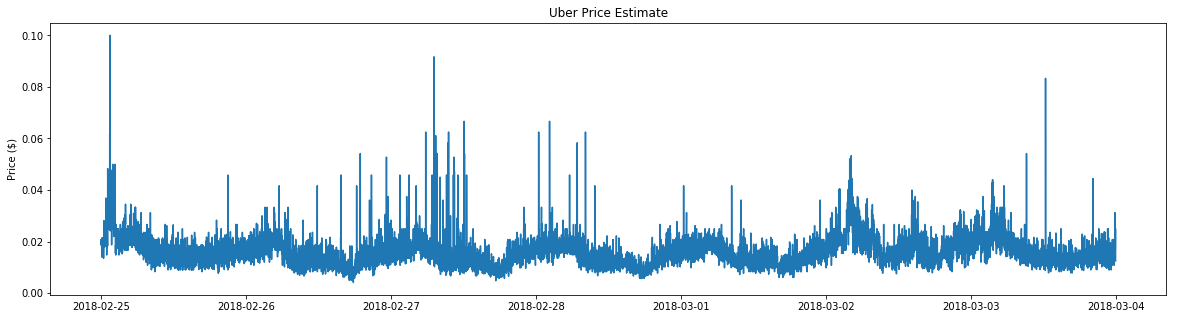

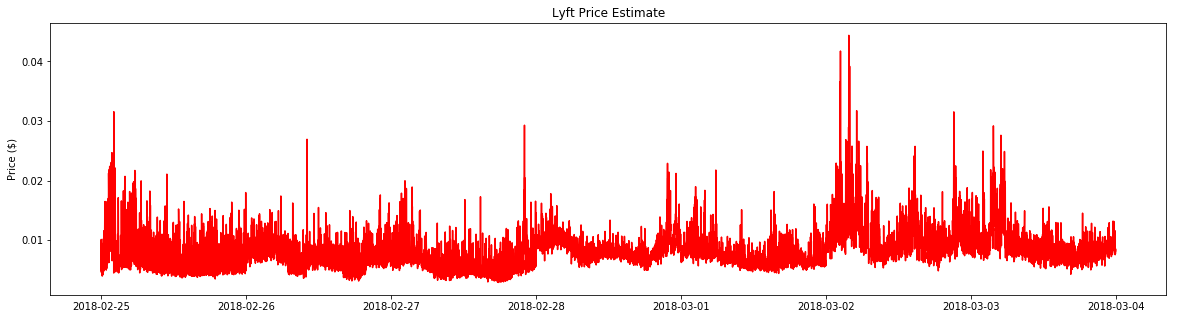

In [208]:
plt.rcParams["figure.figsize"] = (20, 5)
plt.plot(df1.index, df1['uber_price_per_second'])
plt.title('Uber Price Estimate')
plt.ylabel('Price ($)')
plt.show()

plt.plot(df2.index, df2['lyft_price_per_second'], 'r')
plt.title('Lyft Price Estimate')
plt.ylabel('Price ($)')
plt.show()

In [209]:
# Merge the two datasets
df = df1.merge(df2, how='inner', on='ds')

In [210]:
df.head()

,ds,date,day,uber_display_name,uber_distance,uber_duration,end_latitude,end_location,end_longitude,uber_max_estimate,...,y_x,uber_price_per_second,lyft_display_name,lyft_max_estimate,lyft_min_estimate,lyft_distance,lyft_duration,lyft_category,y_y,lyft_price_per_second
0,2/25/2018 0:00,25-Feb-18,Sunday,POOL,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,13,...,11.0,0.020370,Lyft Line,3.52,3.52,3.10,745,Carpool Service,3.52,0.004725
1,2/25/2018 0:01,25-Feb-18,Sunday,POOL,1.50,420,42.355373,Boston Common,-71.065750,10,...,8.0,0.019048,Lyft Line,3.08,3.08,1.82,589,Carpool Service,3.08,0.005229
2,2/25/2018 0:02,25-Feb-18,Sunday,POOL,1.45,360,42.363520,Innercity Weightlifting,-71.082860,9,...,7.5,0.020833,Lyft Line,4.28,4.28,1.61,422,Carpool Service,4.28,0.010142
3,2/25/2018 0:03,25-Feb-18,Sunday,POOL,2.26,540,42.370460,Broadway Bicycle School,-71.103520,12,...,10.0,0.018519,Lyft Line,3.35,3.35,2.65,690,Carpool Service,3.35,0.004855
4,2/25/2018 0:04,25-Feb-18,Sunday,POOL,2.47,540,42.352040,Btone Fitness - Back Bay,-71.072590,12,...,10.0,0.018519,Lyft Line,5.89,5.89,2.66,767,Carpool Service,5.89,0.007679


In [211]:
# Select only the relevant columns
df = df.ix[:, ['ds', 'uber_price_per_second', 'lyft_price_per_second']]

df.head()

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,ds,uber_price_per_second,lyft_price_per_second
0,2/25/2018 0:00,0.020370,0.004725
1,2/25/2018 0:01,0.019048,0.005229
2,2/25/2018 0:02,0.020833,0.010142
3,2/25/2018 0:03,0.018519,0.004855
4,2/25/2018 0:04,0.018519,0.007679


In [212]:
df.ds = pd.to_datetime(df.ds)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9980 entries, 0 to 9979
Data columns (total 3 columns):
ds                       9980 non-null datetime64[ns]
uber_price_per_second    9980 non-null float64
lyft_price_per_second    9980 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 311.9 KB


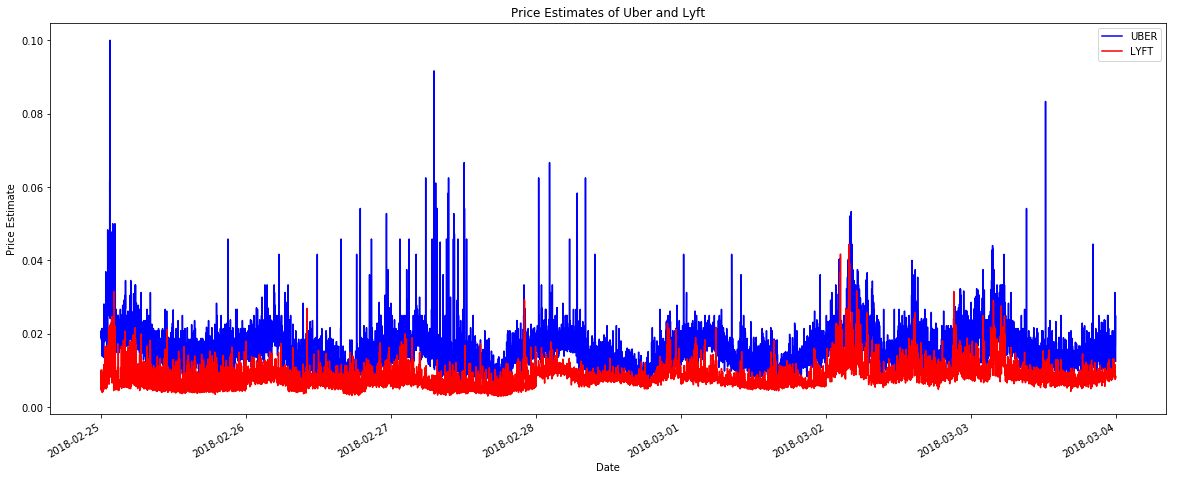

In [214]:
plt.rcParams["figure.figsize"] = (20, 8)
plt.plot(df['ds'], df['uber_price_per_second'], 'b-', label = 'UBER')
plt.plot(df['ds'], df['lyft_price_per_second'], 'r-', label = 'LYFT')
plt.xlabel('Date')
plt.ylabel('Price Estimate')
plt.title('Price Estimates of Uber and Lyft')
plt.gcf().autofmt_xdate()
plt.legend()

In [215]:
# Find the first and last time lyft price estimate was higher than uber
first_date = df.ix[np.min(list(np.where(df['lyft_price_per_second'] > df['uber_price_per_second'])[0])), 'ds']
last_date = df.ix[np.max(list(np.where(df['lyft_price_per_second'] > df['uber_price_per_second'])[0])), 'ds']

print("Lyft's price estimate was higher than Uber from {} to {}.".format(first_date.date(), last_date.date()))

Lyft's price estimate was higher than Uber from 2018-02-25 to 2018-03-03.


/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [216]:
df1 = df[['ds', 'uber_price_per_second']]
df1.head()

,ds,uber_price_per_second
0,2018-02-25 00:00:00,0.020370
1,2018-02-25 00:01:00,0.019048
2,2018-02-25 00:02:00,0.020833
3,2018-02-25 00:03:00,0.018519
4,2018-02-25 00:04:00,0.018519


In [217]:
df2 = df[['ds', 'lyft_price_per_second']]
df2.head()

,ds,lyft_price_per_second
0,2018-02-25 00:00:00,0.004725
1,2018-02-25 00:01:00,0.005229
2,2018-02-25 00:02:00,0.010142
3,2018-02-25 00:03:00,0.004855
4,2018-02-25 00:04:00,0.007679


In [218]:
import fbprophet

# Prophet requires columns ds (Date) and y (value)
df1 = df1.rename(columns={'uber_price_per_second': 'y'})
# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
uber_prophet = fbprophet.Prophet()
uber_prophet.fit(df1)

# Repeat for the lyft data
df2 = df2.rename(columns={'lyft_price_per_second': 'y'})
lyft_prophet = fbprophet.Prophet()
lyft_prophet.fit(df2)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [219]:
# Make a future dataframe for 1 day
uber_forecast = uber_prophet.make_future_dataframe(periods=1440, freq='T')
# Make predictions
uber_forecast = uber_prophet.predict(uber_forecast)

lyft_forecast = lyft_prophet.make_future_dataframe(periods=1440, freq='T')
lyft_forecast = lyft_prophet.predict(lyft_forecast)

Text(0.5,1,'UBER Price Estimate')

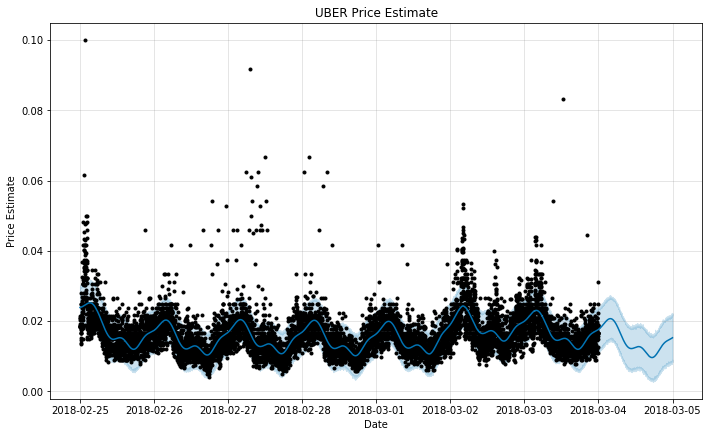

In [220]:
uber_prophet.plot(uber_forecast, xlabel = 'Date', ylabel = 'Price Estimate')
plt.title('UBER Price Estimate')

Text(0.5,1,'LYFT Price Estimate')

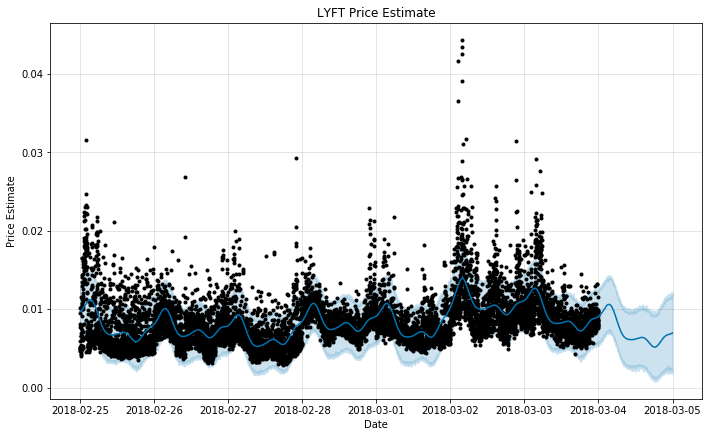

In [221]:
lyft_prophet.plot(lyft_forecast, xlabel = 'Date', ylabel = 'Price Estimate')
plt.title('LYFT Price Estimate')

In [222]:
for changepoint in [0.001, 0.05, 0.1, 0.5]:
    model = fbprophet.Prophet(changepoint_prior_scale=changepoint)
    model.fit(df2)
    
    future = model.make_future_dataframe(periods=1440, freq='T')
    future = model.predict(future)
    
    df2[changepoint] = future['yhat']

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INF

Text(0.5,1,'Effect of Changepoint Prior Scale')

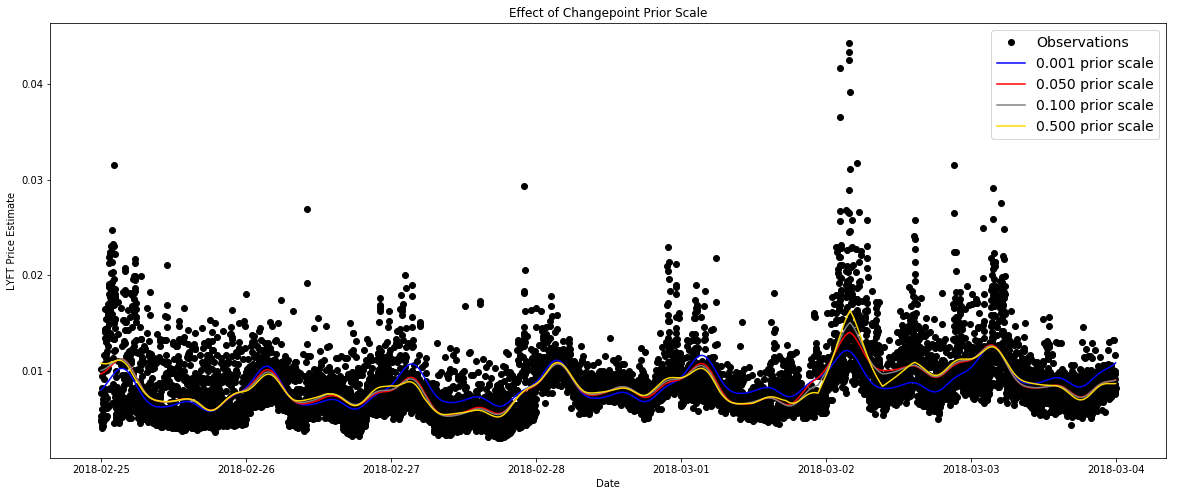

In [223]:
# Create the plot
plt.figure(figsize=(20, 8))

# Actual observations
plt.plot(df2['ds'], df2['y'], 'ko', label = 'Observations')
colors = {0.001: 'b', 0.05: 'r', 0.1: 'grey', 0.5: 'gold'}

# Plot each of the changepoint predictions
for changepoint in [0.001, 0.05, 0.1, 0.5]:
    plt.plot(df2['ds'], df2[changepoint], color = colors[changepoint], label = '%.3f prior scale' % changepoint)
    
plt.legend(prop={'size': 14})
plt.xlabel('Date')
plt.ylabel('LYFT Price Estimate')
plt.title('Effect of Changepoint Prior Scale')

In [224]:
uber_prophet.changepoints[:10]

319    2018-02-25 05:21:00
639    2018-02-25 10:41:00
958    2018-02-25 16:00:00
1277   2018-02-25 21:19:00
1597   2018-02-26 02:39:00
1916   2018-02-26 07:58:00
2236   2018-02-26 13:18:00
2555   2018-02-26 18:41:00
2874   2018-02-27 00:01:00
3194   2018-02-27 05:23:00
Name: ds, dtype: datetime64[ns]

In [225]:
lyft_prophet.changepoints[:10]

319    2018-02-25 05:21:00
639    2018-02-25 10:41:00
958    2018-02-25 16:00:00
1277   2018-02-25 21:19:00
1597   2018-02-26 02:39:00
1916   2018-02-26 07:58:00
2236   2018-02-26 13:18:00
2555   2018-02-26 18:41:00
2874   2018-02-27 00:01:00
3194   2018-02-27 05:23:00
Name: ds, dtype: datetime64[ns]

In [226]:
uber_names = ['uber_%s' % column for column in uber_forecast.columns]
lyft_names = ['lyft_%s' % column for column in lyft_forecast.columns]

# Dataframes to merge
merge_uber_forecast = uber_forecast.copy()
merge_lyft_forecast = lyft_forecast.copy()

# Rename the columns
merge_uber_forecast.columns = uber_names
merge_lyft_forecast.columns = lyft_names

In [227]:
# Merge the two datasets
forecast = pd.merge(merge_uber_forecast, merge_lyft_forecast, how = 'inner', left_on = 'uber_ds', right_on = 'lyft_ds')

# Rename date column
forecast = forecast.rename(columns={'uber_ds': 'Date Time'}).drop('lyft_ds', axis=1)
forecast.head()

,Date Time,uber_trend,uber_trend_lower,uber_trend_upper,uber_yhat_lower,uber_yhat_upper,uber_daily,uber_daily_lower,uber_daily_upper,uber_seasonal,...,lyft_daily,lyft_daily_lower,lyft_daily_upper,lyft_seasonal,lyft_seasonal_lower,lyft_seasonal_upper,lyft_seasonalities,lyft_seasonalities_lower,lyft_seasonalities_upper,lyft_yhat
0,2018-02-25 00:00:00,0.021942,0.021942,0.021942,0.017972,0.029894,0.001947,0.001947,0.001947,0.001947,...,0.000839,0.000839,0.000839,0.000839,0.000839,0.000839,0.000839,0.000839,0.000839,0.009657
1,2018-02-25 00:01:00,0.021932,0.021932,0.021932,0.018196,0.029891,0.001959,0.001959,0.001959,0.001959,...,0.000845,0.000845,0.000845,0.000845,0.000845,0.000845,0.000845,0.000845,0.000845,0.009661
2,2018-02-25 00:02:00,0.021922,0.021922,0.021922,0.017975,0.030344,0.001972,0.001972,0.001972,0.001972,...,0.000851,0.000851,0.000851,0.000851,0.000851,0.000851,0.000851,0.000851,0.000851,0.009666
3,2018-02-25 00:03:00,0.021912,0.021912,0.021912,0.017924,0.029769,0.001985,0.001985,0.001985,0.001985,...,0.000858,0.000858,0.000858,0.000858,0.000858,0.000858,0.000858,0.000858,0.000858,0.009671
4,2018-02-25 00:04:00,0.021902,0.021902,0.021902,0.018014,0.030181,0.001998,0.001998,0.001998,0.001998,...,0.000864,0.000864,0.000864,0.000864,0.000864,0.000864,0.000864,0.000864,0.000864,0.009676


Text(0.5,1,'UBER vs. LYFT Trend')

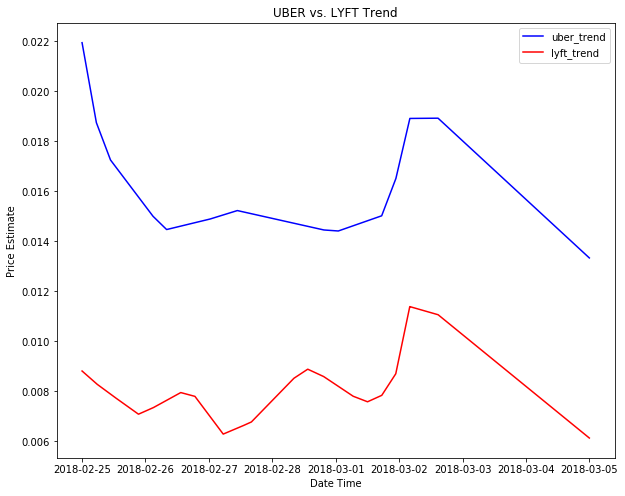

In [228]:
# Visualize Trend Only and the Forecast
plt.figure(figsize=(10, 8))
plt.plot(forecast['Date Time'], forecast['uber_trend'], 'b-')
plt.plot(forecast['Date Time'], forecast['lyft_trend'], 'r-')
plt.legend()
plt.xlabel('Date Time')
plt.ylabel('Price Estimate')
plt.title('UBER vs. LYFT Trend')

Text(0.5,1,'UBER vs. LYFT Estimate')

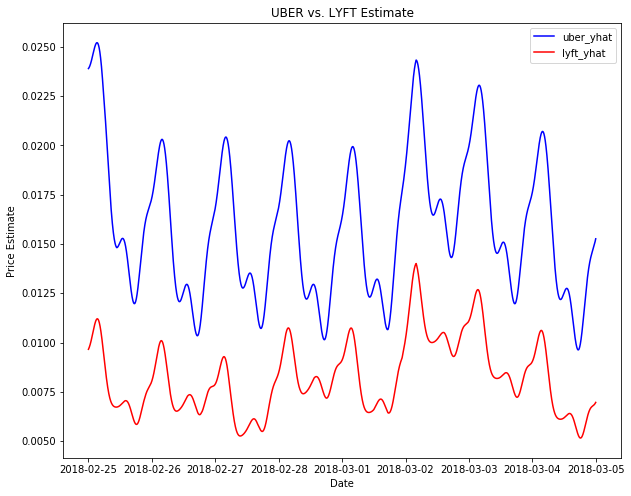

In [229]:
plt.figure(figsize=(10, 8))
plt.plot(forecast['Date Time'], forecast['uber_yhat'], 'b-')
plt.plot(forecast['Date Time'], forecast['lyft_yhat'], 'r-')
plt.legend(); plt.xlabel('Date')
plt.ylabel('Price Estimate')
plt.title('UBER vs. LYFT Estimate')

Text(0.5,1,'Price Prediction for UBER and LYFT')

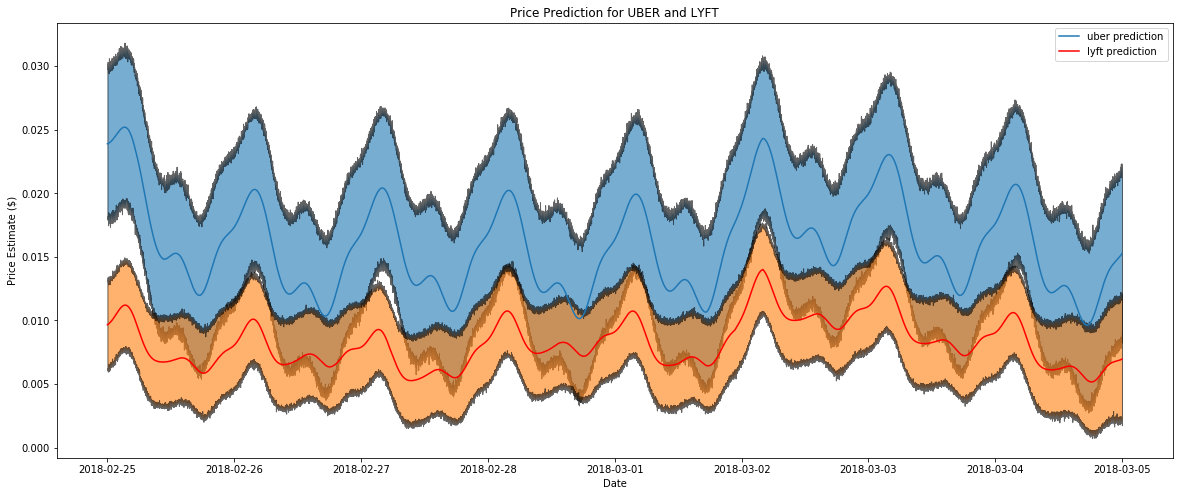

In [230]:
# Create subplots to set figure size
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Plot estimate
ax.plot(forecast['Date Time'], forecast['uber_yhat'], label = 'uber prediction')

# Plot uncertainty values
ax.fill_between(forecast['Date Time'].dt.to_pydatetime(), forecast['uber_yhat_upper'], forecast['uber_yhat_lower'], alpha=0.6, edgecolor = 'k')

# Plot estimate and uncertainty for lyft
ax.plot(forecast['Date Time'], forecast['lyft_yhat'], 'r', label = 'lyft prediction')
ax.fill_between(forecast['Date Time'].dt.to_pydatetime(), forecast['lyft_yhat_upper'], forecast['lyft_yhat_lower'], alpha=0.6, edgecolor = 'k')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price Estimate ($)')
plt.title('Price Prediction for UBER and LYFT')

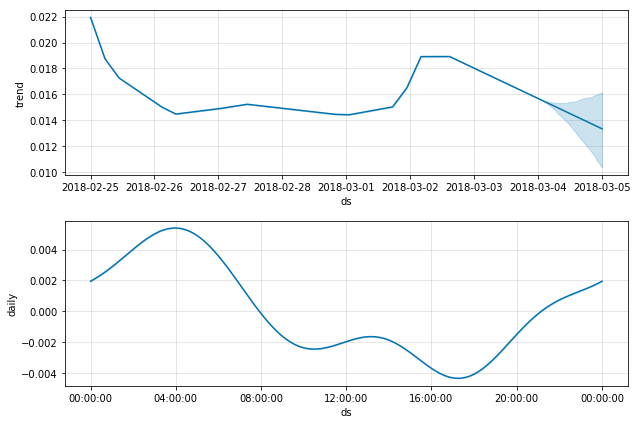

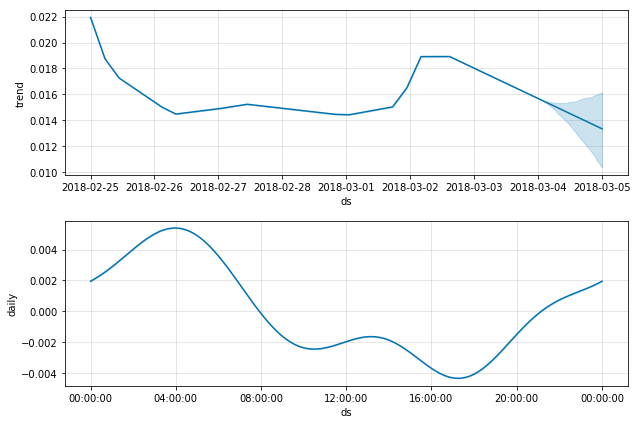

In [231]:
uber_prophet.plot_components(uber_forecast)

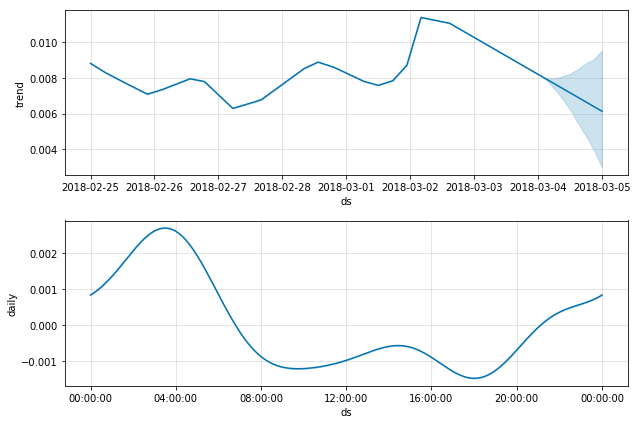

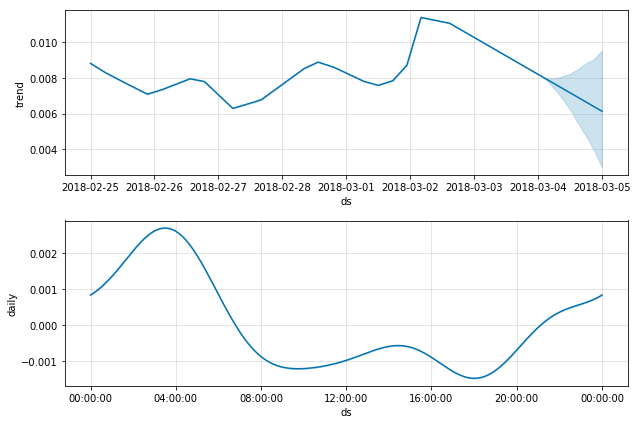

In [232]:
lyft_prophet.plot_components(lyft_forecast)

In [233]:
import tensorflow as tf
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

In [234]:
df1 = pd.read_csv('uber_carpoolservice.csv')
df2 = pd.read_csv('lyft_carpoolservice.csv')
df1.head()

,Unnamed: 0,date_time,date,day,uber_display_name,uber_distance,uber_duration,end_latitude,end_location,end_longitude,...,main_temp,main_temp_max,main_temp_min,uber_product_id,start_latitude,start_location,start_longitude,time,weather,uber_category
0,0,2/25/2018 0:00,25-Feb-18,Sunday,POOL,2.83,540,42.363046,Charles River Canoe & Kayak,-71.082354,...,39.52,44.6,33.8,997acbb5-e102-41e1-b155-9df7de0a73f2,42.361652,Urban AdvenTours,-71.052037,0:00:04,Clear,Carpool Service
1,6,2/25/2018 0:01,25-Feb-18,Sunday,POOL,1.50,420,42.355373,Boston Common,-71.065750,...,39.52,44.6,33.8,997acbb5-e102-41e1-b155-9df7de0a73f2,42.347060,Kings Dining & Entertainment - Boston Back Bay,-71.085650,0:01:03,Clear,Carpool Service
2,12,2/25/2018 0:02,25-Feb-18,Sunday,POOL,1.45,360,42.363520,Innercity Weightlifting,-71.082860,...,39.47,44.6,33.8,997acbb5-e102-41e1-b155-9df7de0a73f2,42.377843,Achieve Fitness,-71.091881,0:02:03,Clear,Carpool Service
3,18,2/25/2018 0:03,25-Feb-18,Sunday,POOL,2.26,540,42.370460,Broadway Bicycle School,-71.103520,...,39.79,44.6,33.8,997acbb5-e102-41e1-b155-9df7de0a73f2,42.348503,Commonwealth Avenue Mall,-71.094223,0:03:04,Clear,Carpool Service
4,24,2/25/2018 0:04,25-Feb-18,Sunday,POOL,2.47,540,42.352040,Btone Fitness - Back Bay,-71.072590,...,38.95,44.6,33.8,997acbb5-e102-41e1-b155-9df7de0a73f2,42.365095,Prana Power Yoga,-71.102730,0:04:03,Clear,Carpool Service


In [235]:
df1['uber_price_estimate'] = (df1['uber_max_estimate'] + df1['uber_min_estimate'])/2
df2['lyft_price_estimate'] = (df2['lyft_max_estimate'] + df2['lyft_min_estimate'])/2

In [236]:
df1.columns

Index(['Unnamed: 0', 'date_time', 'date', 'day', 'uber_display_name',
       'uber_distance', 'uber_duration', 'end_latitude', 'end_location',
       'end_longitude', 'uber_max_estimate', 'uber_min_estimate', 'main_temp',
       'main_temp_max', 'main_temp_min', 'uber_product_id', 'start_latitude',
       'start_location', 'start_longitude', 'time', 'weather', 'uber_category',
       'uber_price_estimate'],
      dtype='object')

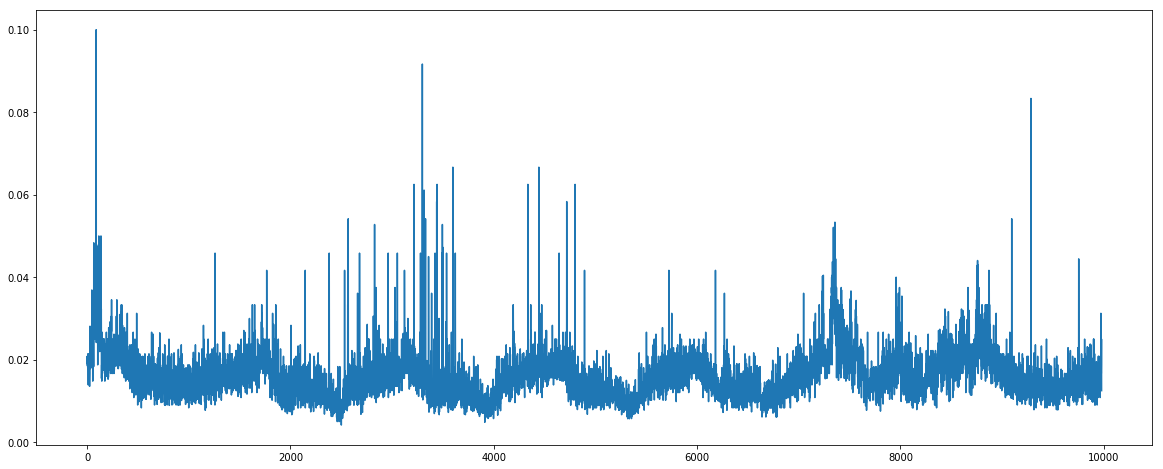

In [237]:
df1['uber_price_per_second'] = df1.uber_price_estimate/df1.uber_duration
df1['uber_price_per_second'].plot()

In [238]:
TS = np.array(df1['uber_price_per_second'])
num_periods = 100
f_horizon = 1

x_data = TS[:(len(TS)-(len(TS) % num_periods))]
x_batches = x_data.reshape(-1, 100, 1)

y_data = TS[1:(len(TS)-(len(TS) % num_periods)) + f_horizon]
y_batches = y_data.reshape(-1, 100, 1)
print(len(x_batches))
print(x_batches.shape)
print(x_batches[0:2])

print(y_batches[0:1])
print(y_batches.shape)

99
(99, 100, 1)
[[[0.02037037]
  [0.01904762]
  [0.02083333]
  [0.01851852]
  [0.01851852]
  [0.02083333]
  [0.01818182]
  [0.01833333]
  [0.02142857]
  [0.01851852]
  [0.01851852]
  [0.01904762]
  [0.01388889]
  [0.02083333]
  [0.01851852]
  [0.01759259]
  [0.02142857]
  [0.01818182]
  [0.02142857]
  [0.01527778]
  [0.01833333]
  [0.01458333]
  [0.01666667]
  [0.01770833]
  [0.01666667]
  [0.01354167]
  [0.01666667]
  [0.025     ]
  [0.025     ]
  [0.028125  ]
  [0.01818182]
  [0.01805556]
  [0.02407407]
  [0.0219697 ]
  [0.01785714]
  [0.01875   ]
  [0.01851852]
  [0.02583333]
  [0.02083333]
  [0.01818182]
  [0.01875   ]
  [0.02685185]
  [0.02083333]
  [0.02083333]
  [0.0202381 ]
  [0.01904762]
  [0.02261905]
  [0.03690476]
  [0.02380952]
  [0.03257576]
  [0.02291667]
  [0.03095238]
  [0.0202381 ]
  [0.01833333]
  [0.03055556]
  [0.02361111]
  [0.01481481]
  [0.0212963 ]
  [0.01851852]
  [0.03055556]
  [0.03181818]
  [0.01794872]
  [0.03055556]
  [0.02619048]
  [0.02222222]
  [0.0183

In [239]:
def test_data(series, forecast, num_periods):
    test_x_setup = TS[-(num_periods + forecast):]
    testX = test_x_setup[:num_periods].reshape(-1, 100, 1)
    testY = TS[-(num_periods):].reshape(-1, 100, 1)
    return testX, testY

X_test, Y_test = test_data(TS, f_horizon, num_periods)
print(X_test.shape)
print(X_test)

(1, 100, 1)
[[[0.01481481]
  [0.01805556]
  [0.01666667]
  [0.01203704]
  [0.01875   ]
  [0.01089744]
  [0.01410256]
  [0.00984848]
  [0.01547619]
  [0.01180556]
  [0.01083333]
  [0.01203704]
  [0.01527778]
  [0.01416667]
  [0.00972222]
  [0.01515152]
  [0.02037037]
  [0.01574074]
  [0.01309524]
  [0.01875   ]
  [0.01547619]
  [0.025     ]
  [0.01145833]
  [0.01203704]
  [0.025     ]
  [0.01547619]
  [0.01666667]
  [0.01833333]
  [0.01666667]
  [0.01785714]
  [0.02142857]
  [0.02142857]
  [0.01666667]
  [0.01388889]
  [0.01388889]
  [0.00897436]
  [0.01547619]
  [0.01145833]
  [0.01547619]
  [0.01083333]
  [0.01203704]
  [0.01212121]
  [0.00984848]
  [0.01666667]
  [0.0125    ]
  [0.01875   ]
  [0.01555556]
  [0.01944444]
  [0.01904762]
  [0.01666667]
  [0.01944444]
  [0.01875   ]
  [0.01904762]
  [0.01488095]
  [0.01851852]
  [0.01602564]
  [0.00902778]
  [0.01309524]
  [0.01547619]
  [0.01736111]
  [0.01833333]
  [0.01666667]
  [0.01851852]
  [0.01904762]
  [0.01875   ]
  [0.01083333

In [240]:
tf.reset_default_graph()

num_periods = 100
inputs = 1
hidden = 500
output = 1

X = tf.placeholder(tf.float32, [None, num_periods, inputs])
y = tf.placeholder(tf.float32, [None, num_periods, output])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden, activation=tf.nn.relu)
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

learning_rate = 0.001

stacked_rnn_output = tf.reshape(rnn_output, [-1, hidden])
stacked_outputs = tf.layers.dense(stacked_rnn_output, output)
outputs = tf.reshape(stacked_outputs, [-1, num_periods, output])

loss = tf.reduce_sum(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [241]:
epochs = 1000

with tf.Session() as sess:
    init.run()
    for ep in range(epochs):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if ep % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print(ep, '\tMSE:', mse)
            
    y_pred = sess.run(outputs, feed_dict={X: X_test})
    print(y_pred)

0 	MSE: 0.63868135
100 	MSE: 0.22074977
200 	MSE: 0.20484427
300 	MSE: 0.20151567
400 	MSE: 0.19635269
500 	MSE: 0.20383126
600 	MSE: 0.2055463
700 	MSE: 0.19496207
800 	MSE: 0.19579893
900 	MSE: 0.19127817
[[[0.01652912]
  [0.01637239]
  [0.01637403]
  [0.01670909]
  [0.0160396 ]
  [0.01579889]
  [0.01502792]
  [0.01492104]
  [0.0149188 ]
  [0.01479939]
  [0.01427872]
  [0.01408726]
  [0.0143382 ]
  [0.01433294]
  [0.01380632]
  [0.01389564]
  [0.01467632]
  [0.01470887]
  [0.01456781]
  [0.01513654]
  [0.01547082]
  [0.01570058]
  [0.0155183 ]
  [0.01535678]
  [0.01564465]
  [0.01621648]
  [0.01612463]
  [0.01674729]
  [0.01708878]
  [0.01695908]
  [0.01756886]
  [0.01815665]
  [0.01796109]
  [0.01766881]
  [0.01731986]
  [0.01656827]
  [0.01619346]
  [0.01606458]
  [0.01577145]
  [0.01542662]
  [0.01494493]
  [0.01477069]
  [0.01434328]
  [0.01440868]
  [0.01446696]
  [0.01456166]
  [0.01491218]
  [0.0152693 ]
  [0.015823  ]
  [0.01600569]
  [0.01639989]
  [0.01696191]
  [0.01720371

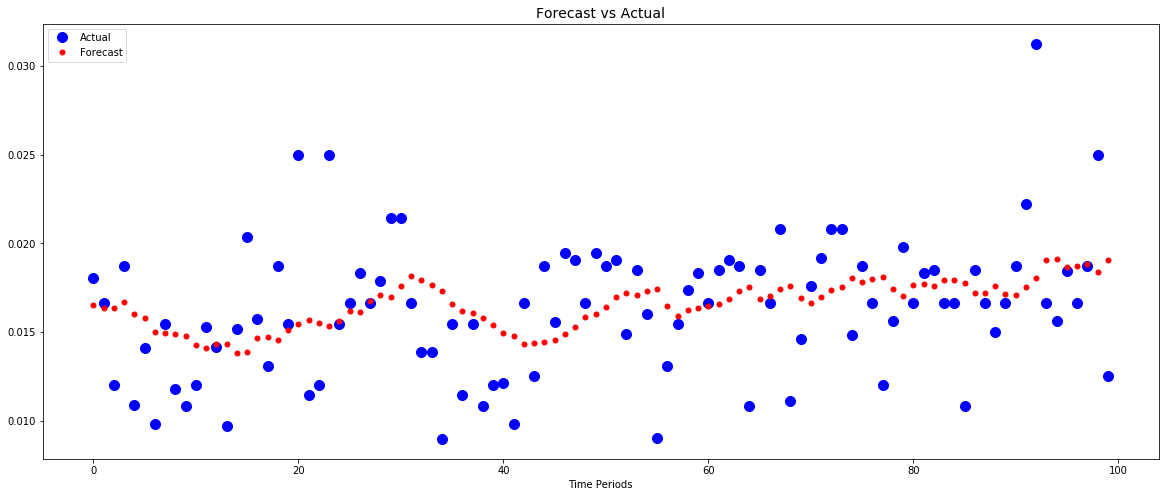

In [242]:
plt.title('Forecast vs Actual', fontsize=14)
plt.plot(pd.Series(np.ravel(Y_test)), 'bo', markersize=10, label='Actual')
plt.plot(pd.Series(np.ravel(y_pred)), 'r.', markersize=10, label='Forecast')
plt.legend(loc='upper left')
plt.xlabel('Time Periods')
plt.show()

In [243]:
df.head()

,ds,uber_price_per_second,lyft_price_per_second
0,2018-02-25 00:00:00,0.020370,0.004725
1,2018-02-25 00:01:00,0.019048,0.005229
2,2018-02-25 00:02:00,0.020833,0.010142
3,2018-02-25 00:03:00,0.018519,0.004855
4,2018-02-25 00:04:00,0.018519,0.007679
